In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### Importing my dataset

In [2]:
file='/home/jstiles4/clim680_dataset/ERA5_Reanalysis_Precip_dataset.grib'
ds=xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:     (time: 252, latitude: 41, longitude: 53)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 1989-12-31T18:00:00 ... 2010-11-30T18:0...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 48.0 47.75 47.5 47.25 ... 38.5 38.25 38.0
  * longitude   (longitude) float64 -80.0 -79.75 -79.5 ... -67.5 -67.25 -67.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-22T13:52 GRIB to CDM+CF via cfgrib-0.9.1...

##### Converting the precipitation values in my dataset from m/day to mm/day by multiplying by 1000

In [3]:
ds = ds*1000

## Washington, D.C.

##### Based on earlier calculations, I discovered that Washington, D.C. consistently experienced some of the lowest tp values in the entire Northeast U.S. Because of this, I chose to further explore this area to find any changes in precipitation trends, as well as discover which years show the strongest positive or negative anomalies. I began with creating a line plot that shows the full scale of the precipitation trends at this location by selecting the approximate latitude and longitude values. This would also be useful in showing the likely trends of the surrounding region, as it was observed in previous maps that the area surrounding Washington, D.C. experienced amounts of precipitation through the same time frame.

Text(0, 0.5, 'mm/day')

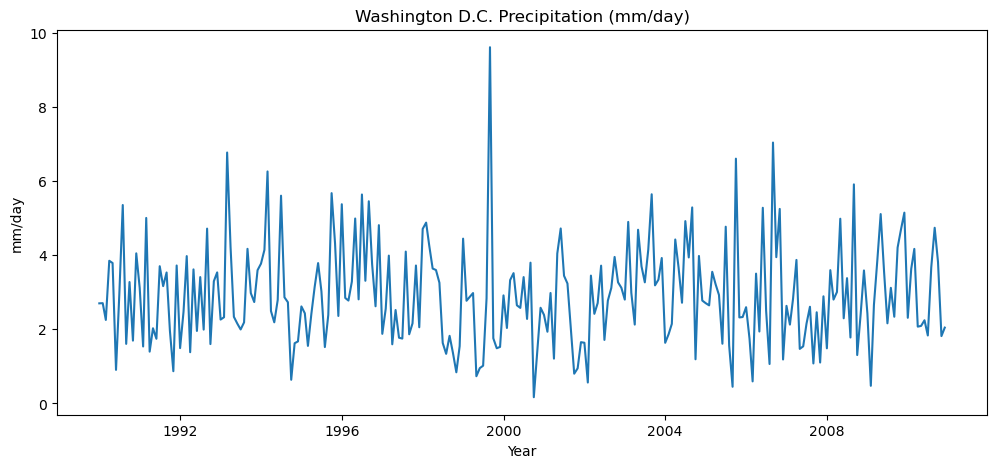

In [4]:
da_pt = ds['tp'].sel(latitude=39,longitude=-77,method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(da_pt.time,da_pt)
plt.title('Washington D.C. Precipitation (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Here, I calculated the mean tp values for the entire region and grouped them by month.

In [5]:
ds_climo = ds.groupby('time.month').mean()

##### I then took the grouped dataset (ds_climo) and applied it to the selected location (Washington, D.C.) to create a line plot of the typical precipiation trend by month. I also created line plots for the trends in 1990 and 2010 specifically to show the differences between the first and last year in the dataset.

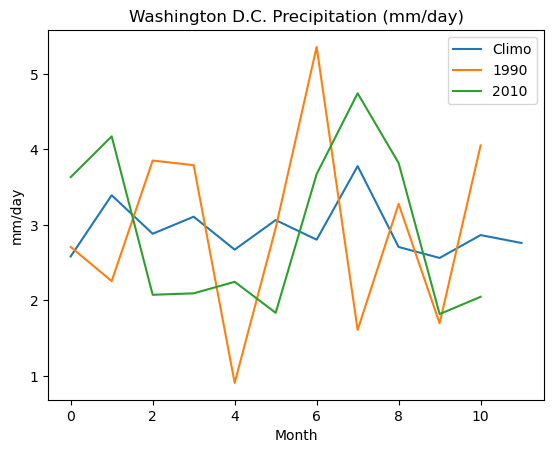

In [6]:
da_ptclimo = ds_climo['tp'].sel(latitude=39,longitude=-77,method='nearest')
da_pt1990 = da_pt.sel(time=slice('1990-01-01','1990-12-01'))
da_pt2010 = da_pt.sel(time=slice('2010-01-01','2010-12-01'))

plt.plot(da_ptclimo,label='Climo')
plt.plot(da_pt1990,label='1990')
plt.plot(da_pt2010,label='2010')                    

plt.title('Washington D.C. Precipitation (mm/day)')
plt.xlabel('Month')
plt.ylabel('mm/day')
plt.legend()

##### Creating monthly anomalies for every location by subtracting the total mean value from the data grouped by month.

In [7]:
ds_anoms = ds.groupby('time.month')-ds_climo

##### By using the monthly anomalies (ds_anoms), I could select the latitude and longitude values of Washington D.C. to show the monthly anomaly trend through the entire 1990-2010 time frame.

Text(0, 0.5, 'mm/day')

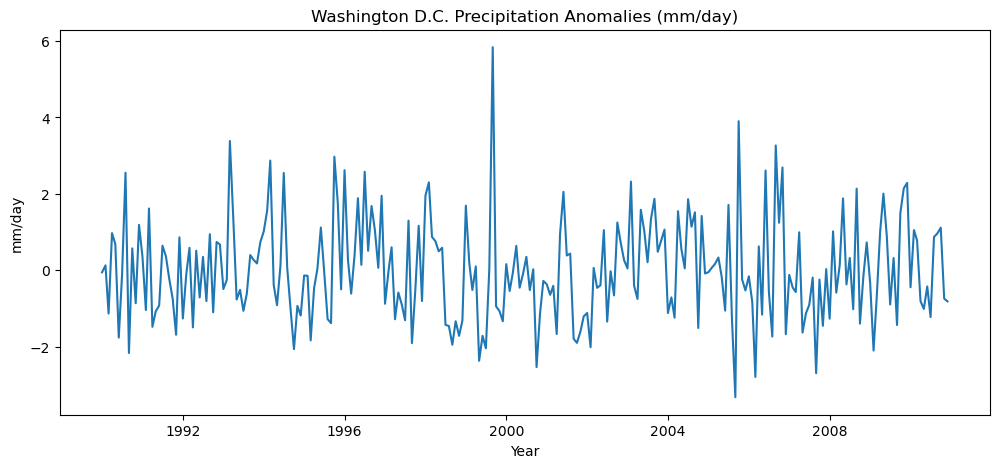

In [8]:
da_anomspt = ds_anoms['tp'].sel(latitude=39,longitude=-77,method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(da_anomspt['time'],da_anomspt)
plt.title('Washington D.C. Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Finally, I plotted the anomaly trend along with the 1 year running mean and 10 year running mean trends to show average anomaly trends over longer time frames.

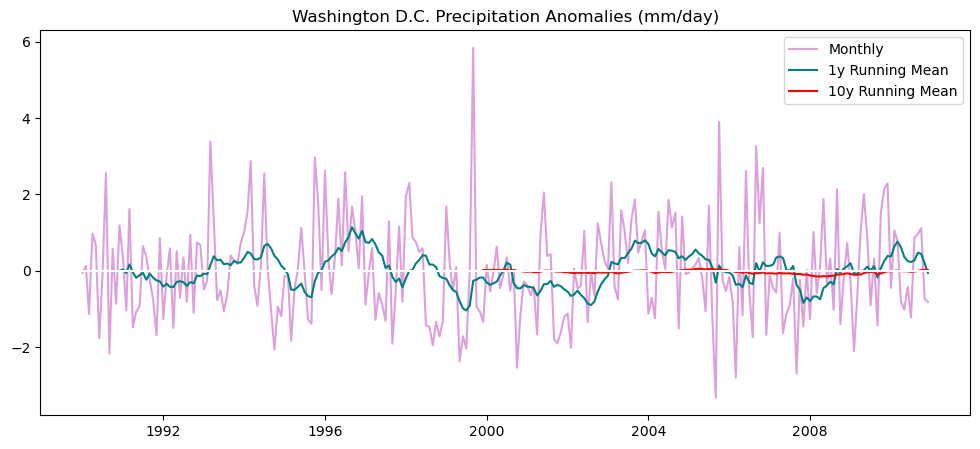

In [9]:
da_smooth_1y = da_anomspt.rolling(time=12).mean()
da_smooth_10y = da_anomspt.rolling(time=120).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(da_anomspt['time'],da_anomspt,label='Monthly',c='plum')
plt.plot(da_smooth_1y['time'],da_smooth_1y,label='1y Running Mean',c='teal')
plt.plot(da_smooth_10y['time'],da_smooth_10y,label='10y Running Mean',c='red')
plt.axhline(y=0,c='white')
plt.title('Washington D.C. Precipitation Anomalies (mm/day)')
plt.legend()

## Upstate New York

##### The area that showed the most consistently high tp values was Upstate New York, or the section of New York just east of Lake Ontario. So, I also chose to compute the anomalies at this region using the same process as before, with the only necessary change being the different latitude and longitude values.

Text(0, 0.5, 'mm/day')

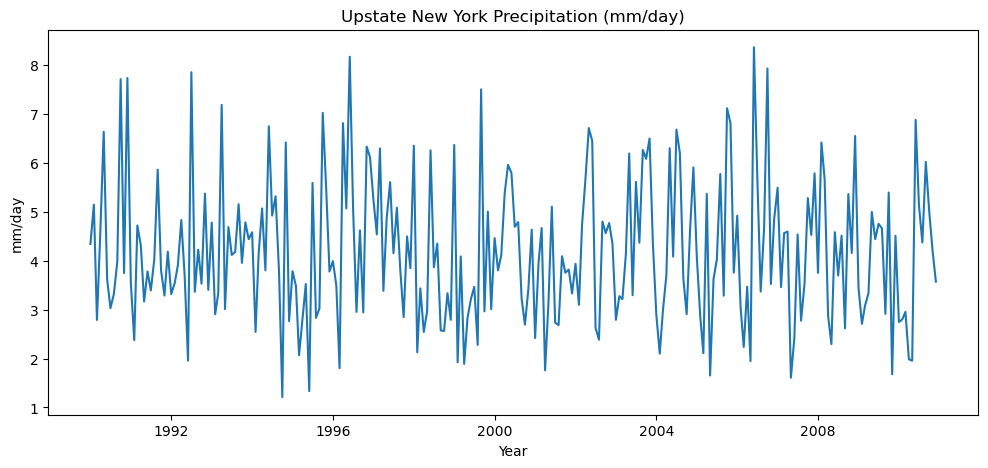

In [10]:
ds_pt = ds['tp'].sel(latitude=43.5,longitude=-75.5, method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(ds_pt.time,ds_pt)
plt.title('Upstate New York Precipitation (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Comparing the average monthly tp trend to the monthly trends in 1990 and 2010

Text(0, 0.5, 'mm/day')

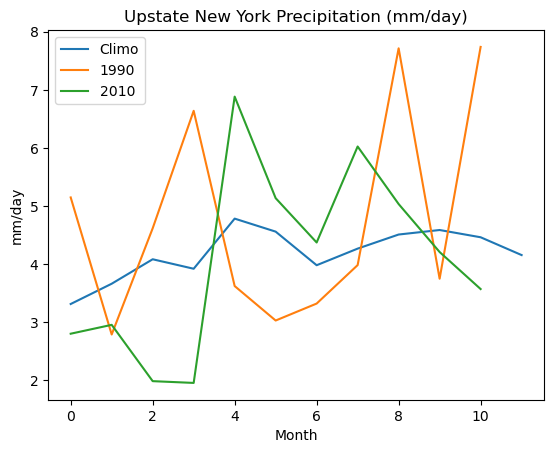

In [11]:
ds_ptclimo = ds_climo['tp'].sel(latitude=43.5,longitude=-75.5,method='nearest')
ds_pt1990 = ds_pt.sel(time=slice('1990-01-01','1990-12-01'))
ds_pt2010 = ds_pt.sel(time=slice('2010-01-01','2010-12-01'))

plt.plot(ds_ptclimo,label='Climo')
plt.plot(ds_pt1990,label='1990')
plt.plot(ds_pt2010,label='2010')                    

plt.title('Upstate New York Precipitation (mm/day)')
plt.legend()
plt.xlabel('Month')
plt.ylabel('mm/day')

##### Plotting the monthly anomaly trends for Upstate New York

Text(0, 0.5, 'mm/day')

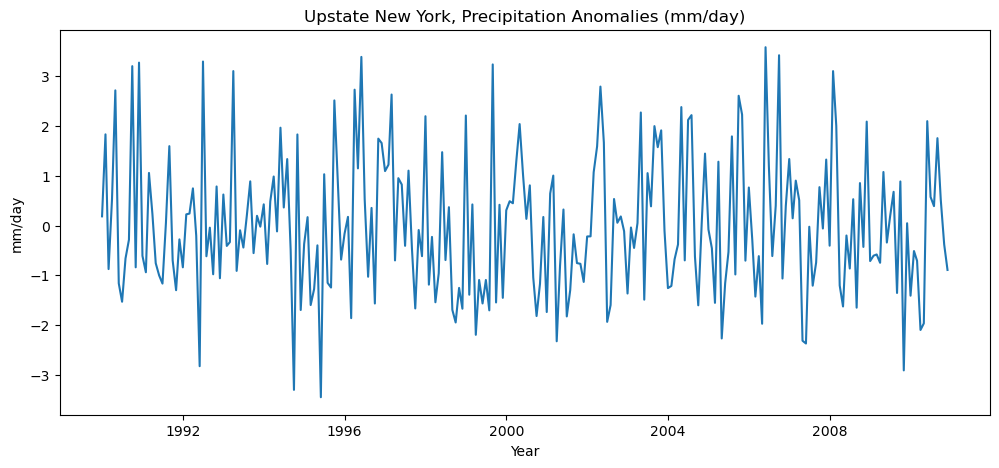

In [12]:
ds_anomspt = ds_anoms['tp'].sel(latitude=43.5,longitude=-75.5,method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(ds_anomspt['time'],ds_anomspt)
plt.title('Upstate New York, Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Comparing the monthly anomaly trends with the 1 year and 10 year running mean anomalies

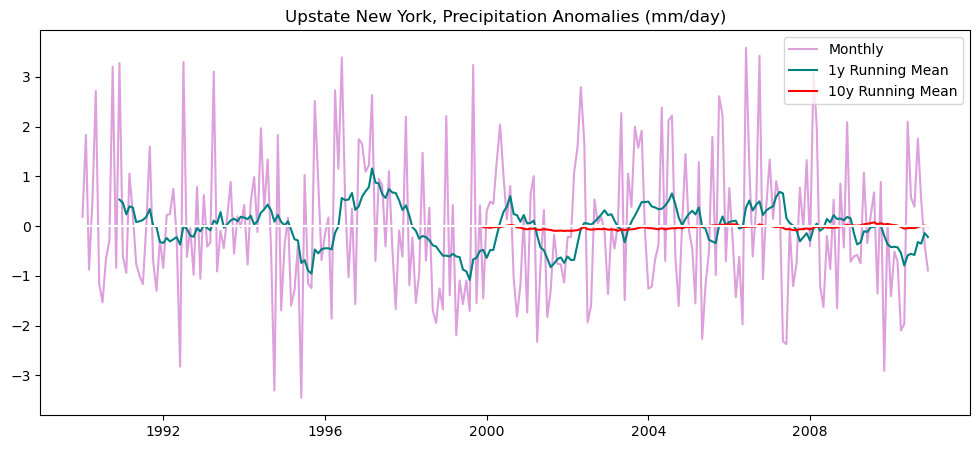

In [13]:
ds_smooth_1y = ds_anomspt.rolling(time=12).mean()
ds_smooth_10y = ds_anomspt.rolling(time=120).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(ds_anomspt['time'],ds_anomspt,label='Monthly',c='plum')
plt.plot(ds_smooth_1y['time'],ds_smooth_1y,label='1y Running Mean',c='teal')
plt.plot(ds_smooth_10y['time'],ds_smooth_10y,label='10y Running Mean',c='red')
plt.axhline(y=0,c='white')
plt.title('Upstate New York, Precipitation Anomalies (mm/day)')
plt.legend()

## Boston

##### The final anomaly location I chose to explore was Boston (MA), as it is located toward the far northeast corner of this region and is close to the Atlantic Ocean.

Text(0, 0.5, 'mm/day')

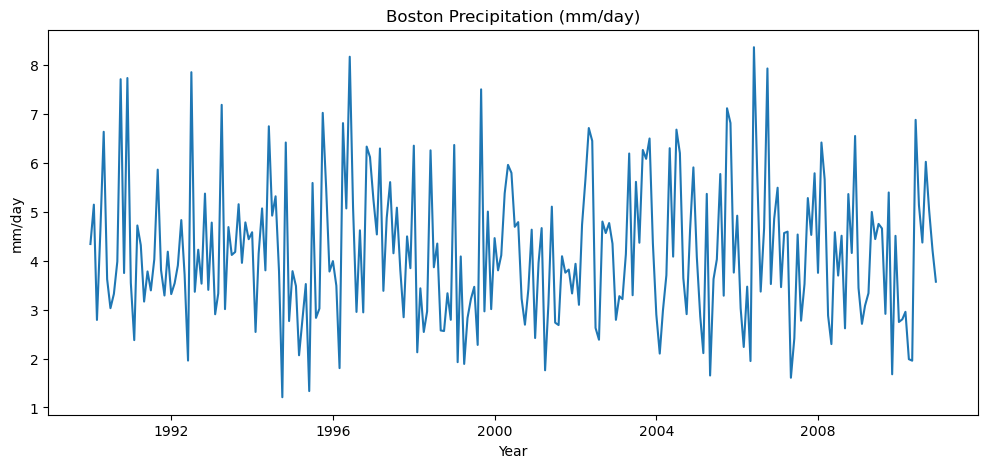

In [14]:
db_pt = ds['tp'].sel(latitude=42.5,longitude=-71, method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(ds_pt.time,ds_pt)
plt.title('Boston Precipitation (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Comparing the average monthly anomaly tp trend to the monthly trends in 1990 and 2010

Text(0, 0.5, 'mm/day')

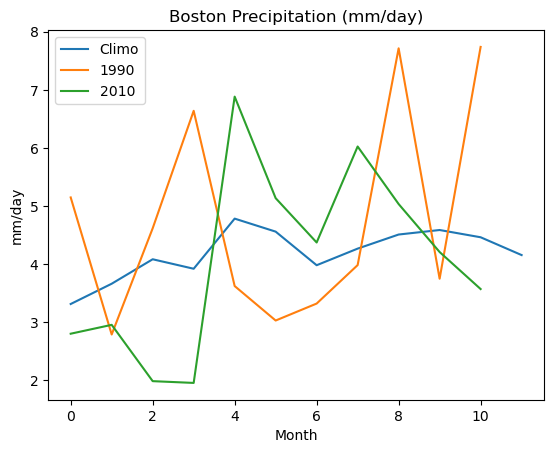

In [15]:
db_ptclimo = ds_climo['tp'].sel(latitude=42.5,longitude=-71,method='nearest')
db_pt1990 = db_pt.sel(time=slice('1990-01-01','1990-12-01'))
db_pt2010 = db_pt.sel(time=slice('2010-01-01','2010-12-01'))

plt.plot(ds_ptclimo,label='Climo')
plt.plot(ds_pt1990,label='1990')
plt.plot(ds_pt2010,label='2010')                    

plt.title('Boston Precipitation (mm/day)')
plt.legend()
plt.xlabel('Month')
plt.ylabel('mm/day')

##### Plotting the monthly anomaly trends for Boston

Text(0, 0.5, 'mm/day')

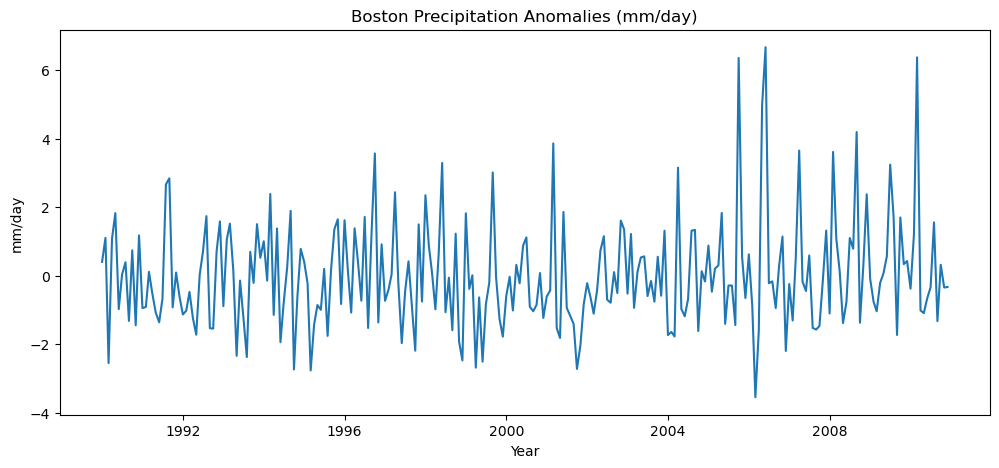

In [16]:
db_anomspt = ds_anoms['tp'].sel(latitude=42.5,longitude=-71,method='nearest')

fig = plt.figure(figsize=(12,5))
plt.plot(db_anomspt['time'],db_anomspt)
plt.title('Boston Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

##### Comparing the monthly anomaly trend with the 1 year and 10 year Running Mean trends

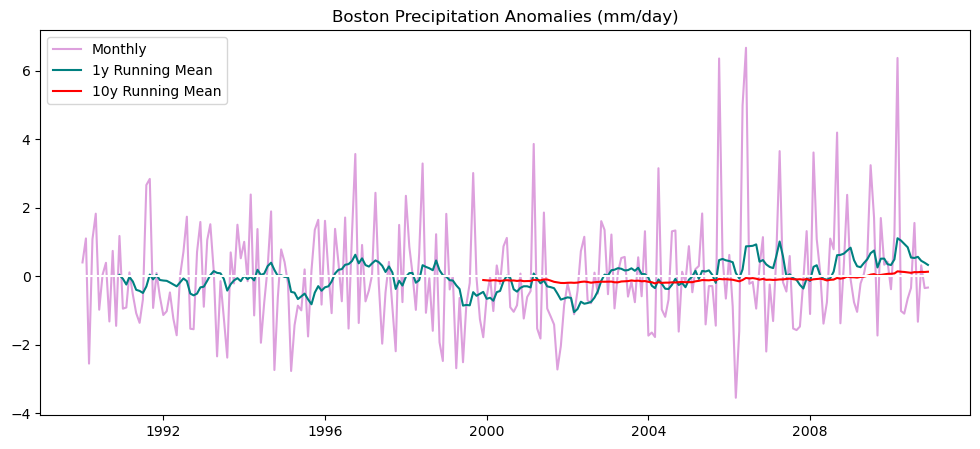

In [17]:
db_smooth_1y = db_anomspt.rolling(time=12).mean()
db_smooth_10y = db_anomspt.rolling(time=120).mean()

fig = plt.figure(figsize=(12,5))
plt.plot(db_anomspt['time'],db_anomspt,label='Monthly',c='plum')
plt.plot(db_smooth_1y['time'],db_smooth_1y,label='1y Running Mean',c='teal')
plt.plot(db_smooth_10y['time'],db_smooth_10y,label='10y Running Mean',c='red')
plt.axhline(y=0,c='white')
plt.title('Boston Precipitation Anomalies (mm/day)')
plt.legend()